In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./owid-covid-data.csv')

print(df.columns)



Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [194]:

countries_per_continent = df.groupby('continent')['location'].nunique()

# Print the count of countries per continent
print("Number of countries per continent:")
print(countries_per_continent)

# Filter for Asia
df_continent_countries = df[df["continent"] == "Asia"]
asia_countries = df_continent_countries['location'].nunique()

# Print Asia-specific info
print("\nNumber of countries in Asia:", asia_countries)
print("Countries in Asia:\n", df_continent_countries['location'].unique())

Number of countries per continent:
continent
Africa           58
Asia             52
Europe           55
North America    41
Oceania          24
South America    14
Name: location, dtype: int64

Number of countries in Asia: 52
Countries in Asia:
 ['Afghanistan' 'Armenia' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Bhutan'
 'Brunei' 'Cambodia' 'China' 'East Timor' 'Georgia' 'Hong Kong' 'is'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Israel' 'Japan' 'Jordan' 'Kazakhstan'
 'Kuwait' 'Kyrgyzstan' 'Laos' 'Lebanon' 'Macao' 'Malaysia' 'Maldives'
 'Mongolia' 'Myanmar' 'Nepal' 'North Korea' 'Northern Cyprus' 'Oman'
 'Pakistan' 'Palestine' 'Philippines' 'Qatar' 'Saudi Arabia' 'Singapore'
 'South Korea' 'Sri Lanka' 'Syria' 'Taiwan' 'Tajikistan' 'Thailand'
 'Turkey' 'Turkmenistan' 'United Arab Emirates' 'Uzbekistan' 'Vietnam'
 'Yemen']


In [186]:
def createDataSet(df):
    
    df_India = df[df['location'] == 'India']
    df_India["date"] = pd.to_datetime(df_India["date"])

    df_India = df_India[['date',  'reproduction_rate', 
                         'new_tests_smoothed', 'positive_rate',
                         'new_vaccinations_smoothed', 'stringency_index','new_cases_smoothed']]
    
    df_India['date'] = pd.to_datetime(df_India['date'], format='%Y-%m-%d')
    df_India.iloc[:, 1:] = df_India.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

    return df_India



In [187]:
def plotDataSet(df):
    df = df.set_index('date')  # Ensure date is the index
    df.plot(subplots=True, figsize=(15, 20))
    plt.show()

In [188]:
def fillMissingValues(df):
    df = df.set_index('date')  # Ensure 'date' is the index
    df["new_tests_smoothed"] = df["new_tests_smoothed"].interpolate(method="time").fillna(df["new_tests_smoothed"].min())
    df["reproduction_rate"]=df["reproduction_rate"].interpolate(method="time").fillna(df["reproduction_rate"].min())
    df["positive_rate"]=df["positive_rate"].interpolate(method="time").fillna(df["positive_rate"].min())
    df["new_vaccinations_smoothed"]=df["new_vaccinations_smoothed"].fillna(0)
    df["stringency_index"]=df["stringency_index"].fillna(df["stringency_index"].min())
    df["new_cases_smoothed"]=df["new_cases_smoothed"].ffill().bfill()
    
    return df.reset_index()  # Keep 'date' as a column for further operations


In [189]:
def correlationMatrix(df):
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
    
    
    


C:\Users\nithi\AppData\Local\Temp\ipykernel_31916\2977124233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_India["date"] = pd.to_datetime(df_India["date"])


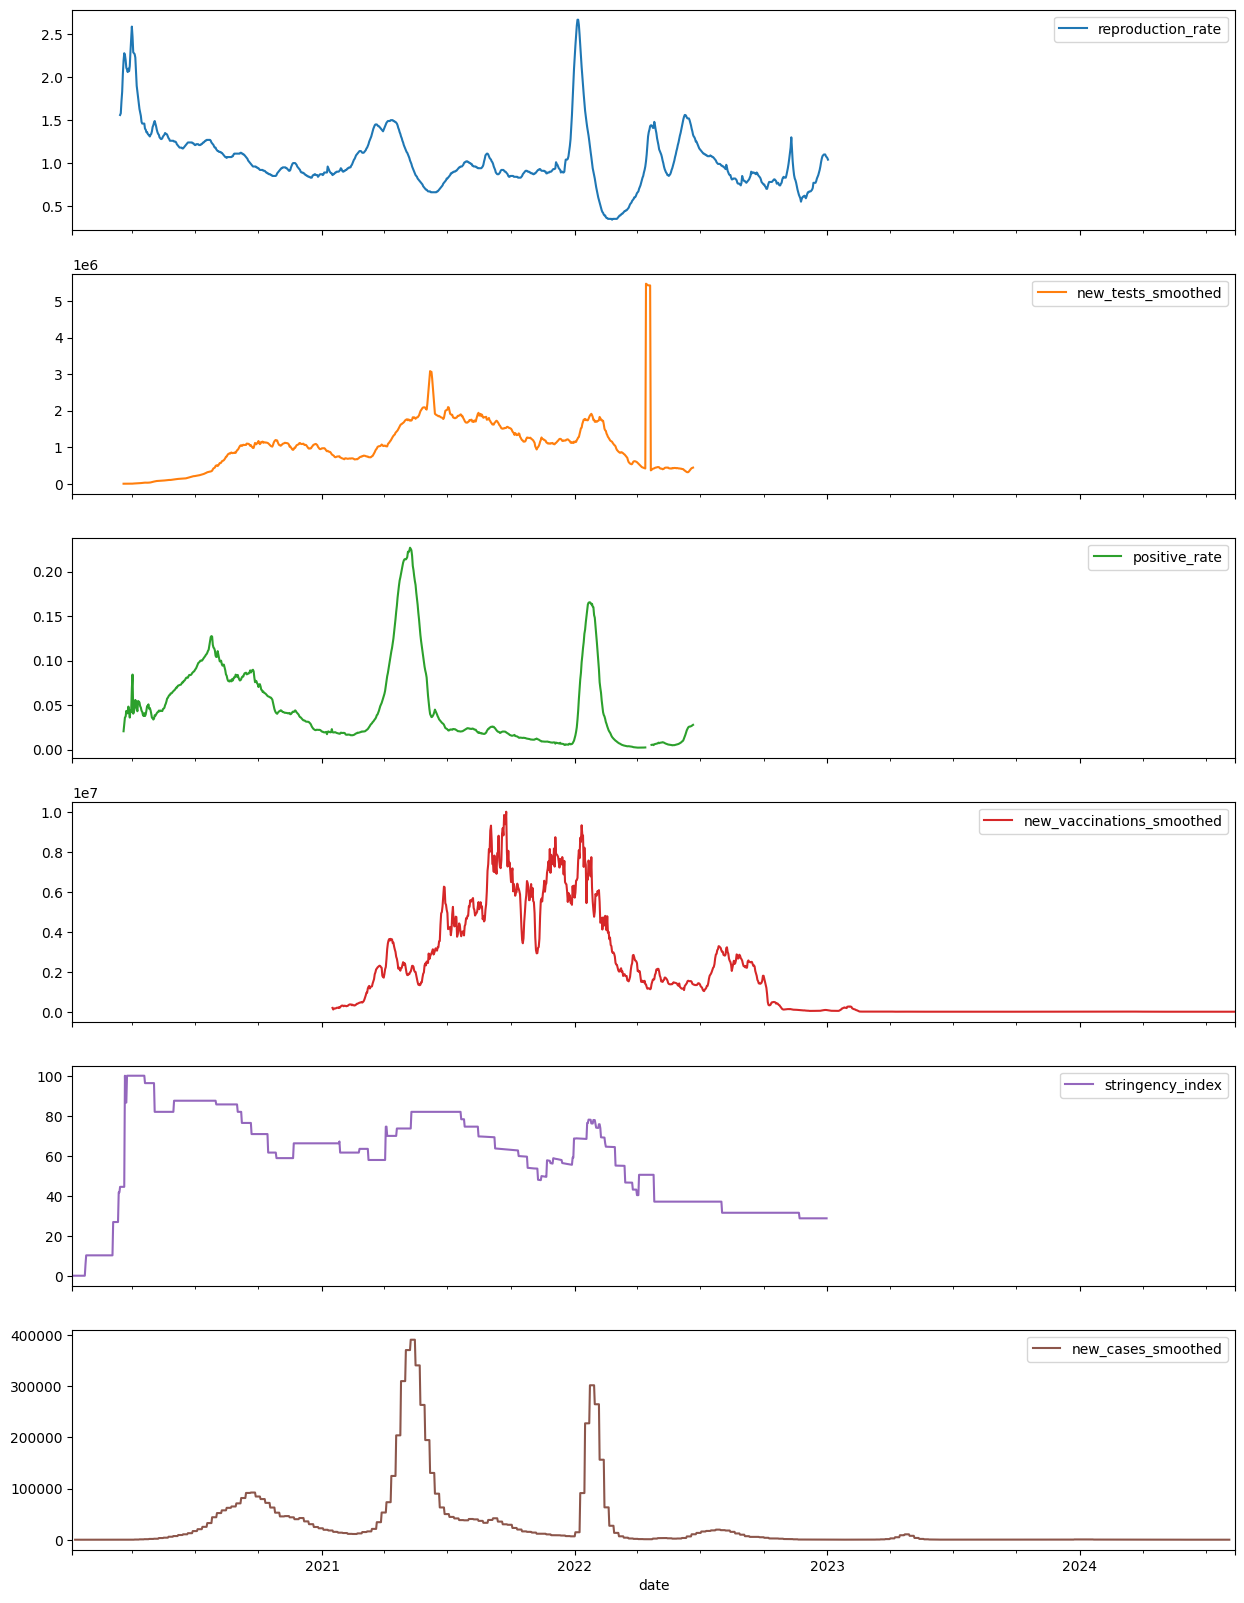

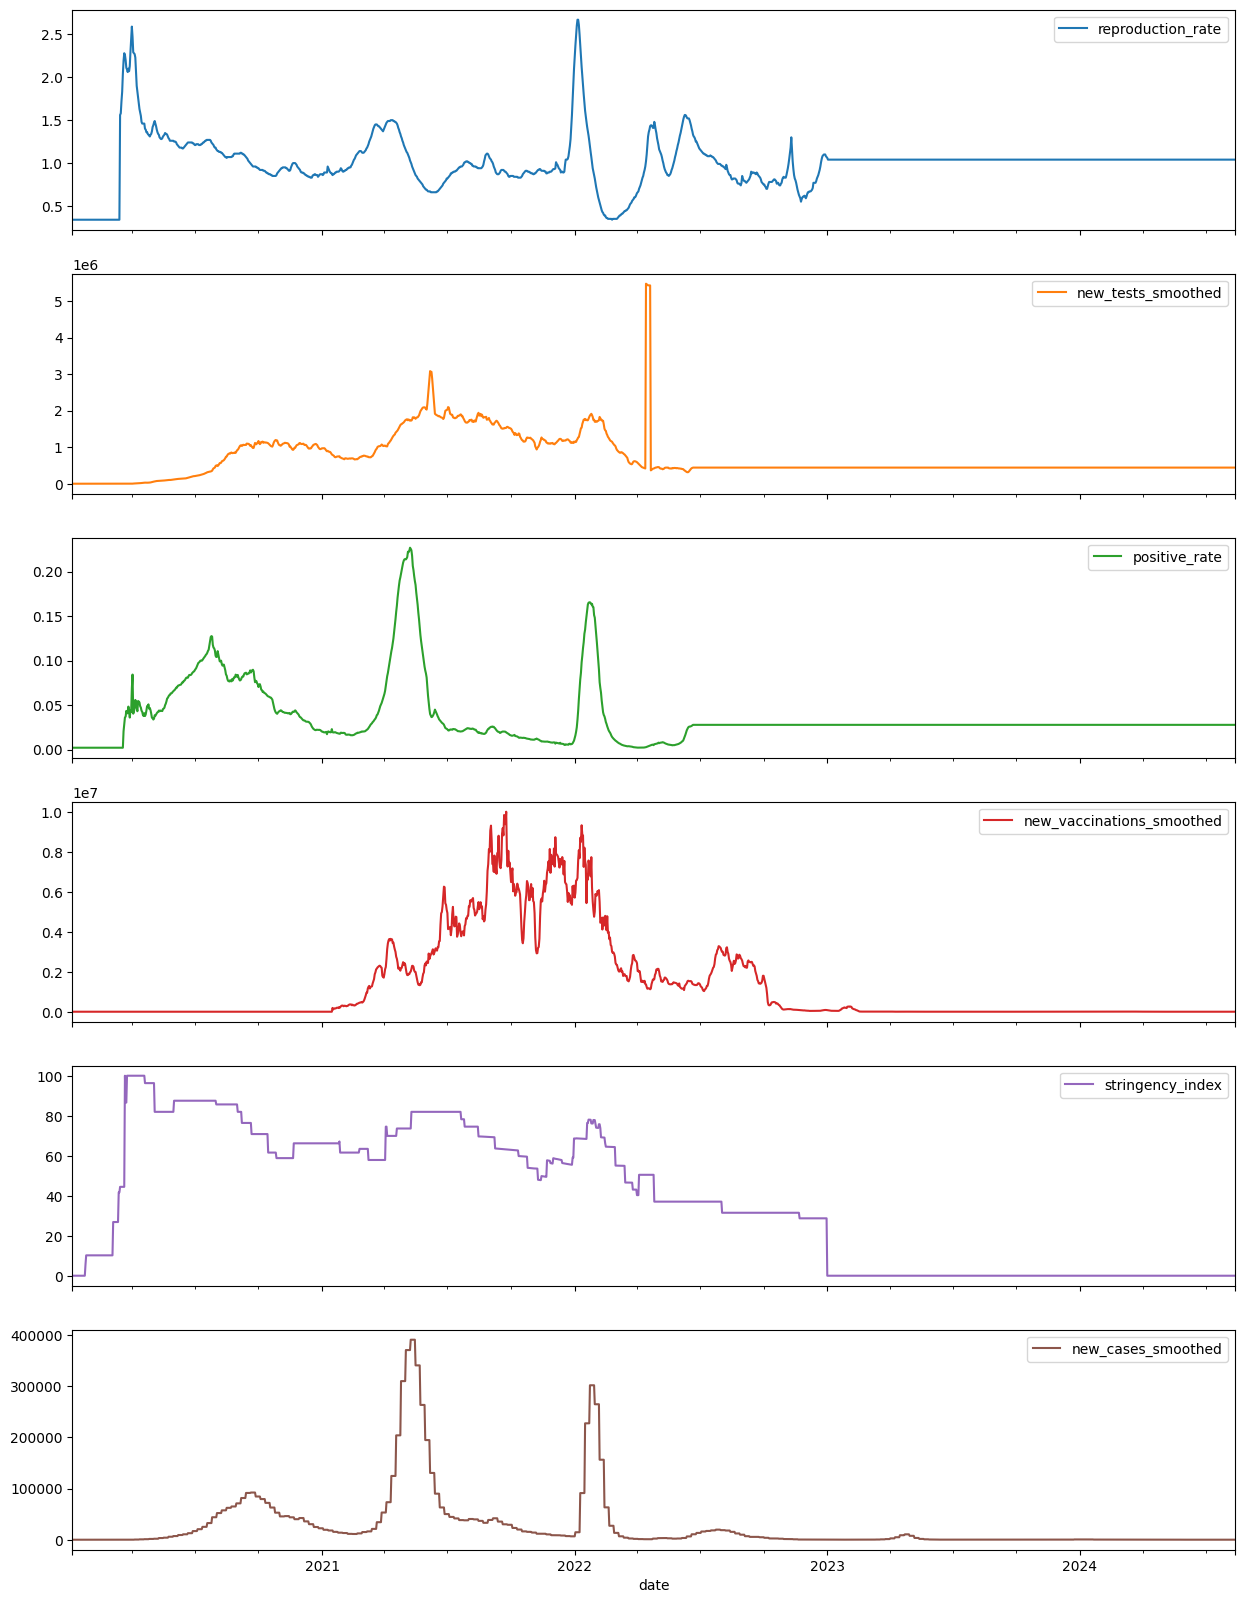

In [ ]:
if __name__=="__main__":
    df_India=createDataSet(df)
    plotDataSet(df_India)
    df_India=fillMissingValues(df_India)
    plotDataSet(df_India)
    
    
    df_India.to_csv("./Covid_India.csv")
    
    
    